## Сборный проет по исследованию  
данных интернет-магазина «Стримчик» по продаже компьютерных игр по всему миру.

 **Описание проекта:**  
Нужно провести исследования данных по продаже игр из открытых источников.  
Данные содержат информацию до 2016 года о продажах игр, названия игр, год выхода, оценку пользователей и экспертов, жанры и платформы.   

 **Цель исследования** : на основе данных о играх и их продажах необходимо:
- отработать принцип работы с данными;  
- выявить определяющие успешность игры закономерности;    
- сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  
Данные результатов анализа и проверок гипотез помогут найти верные решения, которые смогут повысить выручку и будут способствовать росту бизнеса по продаже видеоигр.

# **Шаг №1. Загрузка данных**

In [ ]:
#импортируем необходимые для проведения стат. анализа библиотеки
import pandas as pd

#import seaborn as sns
#import plotly.express as px
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#считываю файлы с данными и записываю датасеты и  их в соответствующие переменные
try:
    games = pd.read_csv('games.csv', engine = 'python')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [ ]:
display (games)
games.info()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


**Выводы:**  

Данные по играм загружены,в датасет games.   
В ходе первого этапа мы ознакомились с общей информацией, проверили данные на предмет пропусков и корректности типов данных.   
При загрузки тип данных data был автоматически переведен в тип дата python. В третьем датасете представлена общая информация о параметрах Подписок - free и ultra  

Названия столбцов в неправильном регистре, в данных есть пропуски, и часть типов данных не корретна. Устраним пропуски, исправим тип данных, найдем дубликаты на следующем этапе работы с данными.

## **Шаг №2. Подготовка данных**

In [ ]:
#приведем названия столбцов к нижнему регистру
#games = games.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release',
#                              'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales',
#                              'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'User_Score': 'user_score',
#                              'Critic_Score': 'critic_score', 'Rating': 'rating'})
games.rename(columns=str.lower)
games.columns = map(str.lower, games.columns)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       16715 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16715 non-null  object 
 3   year_of_release  16446 non-null  float64
 4   genre            16713 non-null  object 
 5   na_sales         16715 non-null  float64
 6   eu_sales         16715 non-null  float64
 7   jp_sales         16715 non-null  float64
 8   other_sales      16715 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       10014 non-null  object 
 11  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b>
    
📝
Ты молодец, что привела названия столбцов к нижнему регистру! Однако есть более простой способ: используй `games.rename(columns=str.lower)`. Это автоматически преобразует все названия столбцов, и тебе не придётся перечислять их вручную. Такой подход экономит время и снижает риск ошибок. Попробуй! 😊
</div>

In [ ]:
#проверим, есть ли в датасете строки - полные дубликаты
display (games.duplicated().sum())
#games = games.drop_duplicates()

0

In [ ]:
#В датасете 11 параметров, в 6-ти из них обнаружены пропуски в данных
display (games['year_of_release'].isna().value_counts())
display (games['critic_score'].isna().value_counts())
display (games['user_score'].isna().value_counts())
display (games['genre'].isna().value_counts())
display (games['rating'].isna().value_counts())
display (games['name'].isna().value_counts())

#games['Year_of_Release'] = games['Year_of_Release'].astype(int)
#games['Year_of_Release'] = pd.to_datetime(games['Year_of_Release'], format='%Y')

False    16446
True       269
Name: year_of_release, dtype: int64

True     8578
False    8137
Name: critic_score, dtype: int64

False    10014
True      6701
Name: user_score, dtype: int64

False    16713
True         2
Name: genre, dtype: int64

False    9949
True     6766
Name: rating, dtype: int64

False    16713
True         2
Name: name, dtype: int64

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий студента</b>
    
Добавила проверку. На самом деле - очень информативно выглядит.
</div>

In [ ]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
unnamed: 0,0.000000
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000


In [ ]:
#найдем неявные дубликаты в перечне столбцов, являющихся базовыми для определения объекта - игры
#название, год,  платформа и жанр
duplicates = games.duplicated(['name', 'platform', 'year_of_release', 'genre']).sum()
display('Количество дублирующихся строк по именам, платформам и году выпуска: ', duplicates)

'Количество дублирующихся строк по именам, платформам и году выпуска: '

2

In [ ]:
#удалим дубликаты
games = games.drop_duplicates(['name', 'platform', 'year_of_release', 'genre'])
duplicates = games.duplicated(['name', 'platform', 'year_of_release', 'genre']).sum()
display('Количество дублирующихся строк по именам, платформам и году выпуска: ', duplicates)

'Количество дублирующихся строк по именам, платформам и году выпуска: '

0

In [ ]:
#удалим пропуски в названиях, т.к. значений таких мало.
games['name'] = games['name'].dropna()
#games['name'] = games['name'].fillna('noname')


In [ ]:
#выведем уникальные жанры, чтобы найти наиболее популярный
display(games['genre'].value_counts())

Action          3369
Sports          2347
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [ ]:
#удалим пропуски, т..к. значений этих оч. мало.
games['genre'] = games['genre'].dropna()

In [ ]:
display (games['name']. nunique() )

11559

In [ ]:
#пропусков в годах 269, а всего игр 11560, что составляет 2.33%. Это менее 5%, поэтому удалим пропуски в годах.
games = games.dropna(subset=['year_of_release'])

In [ ]:
#посчитаем пропуски в данных
display (games['year_of_release'].isna().value_counts())
display (games['critic_score'].isna().value_counts())
display (games['user_score'].isna().value_counts())
display (games['genre'].isna().value_counts())
display (games['rating'].isna().value_counts())
display (games['name'].isna().value_counts())

False    16444
Name: year_of_release, dtype: int64

True     8462
False    7982
Name: critic_score, dtype: int64

False    9838
True     6606
Name: user_score, dtype: int64

False    16443
True         1
Name: genre, dtype: int64

False    9767
True     6677
Name: rating, dtype: int64

False    16443
True         1
Name: name, dtype: int64

Пропуски остались в колонках user_score (6606 шт.), critic_score (7982 шт.), rating (6677 шт.). Удалить нельзя, заменить медианой нельзя, нужно их обозначить определенным образом, чтобы удобно было дальше работать

In [ ]:
#подробнее изучим указанные выше столбцы, какие уникальные значения они содержат
display (games['critic_score'].value_counts(), games['user_score'].value_counts(),games['rating'].value_counts())

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
1.5       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Видим, что на значение 0 заменить не получится, т.к. такой рейтинг присутствует в выборке и нужно подобрать
целочисленное значение, например, -100. Также замечено в колонке user_score значение tbd, которое скорее всего возникло по технической причине,
когда объединяли данные из различных источников.

In [ ]:
#Заменим его на -100

games['rating'] = games['rating'].fillna('unknown')
games['critic_score'] = games['critic_score'].fillna(-100)
games['user_score'] = games['user_score'].fillna(-100)
games.loc[games['user_score'] == 'tbd', 'user_score'] = -100

In [ ]:
#проверим, устранены ли пропуски в данных
display (games['critic_score'].isna().value_counts())
display (games['user_score'].isna().value_counts())
display (games['rating'].isna().value_counts())
games.info()

False    16444
Name: critic_score, dtype: int64

False    16444
Name: user_score, dtype: int64

False    16444
Name: rating, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       16444 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  float64
 4   genre            16443 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     16444 non-null  float64
 10  user_score       16444 non-null  object 
 11  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Пропуски в данных заполнены

In [ ]:
#скорректируем типы в тех данных, где это уместно
games['year_of_release'] = (games['year_of_release']).astype('int')
games['critic_score'] = (games['critic_score']).astype('int')
games['user_score'] = (games['user_score']).astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       16444 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  int64  
 4   genre            16443 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     16444 non-null  int64  
 10  user_score       16444 non-null  float64
 11  rating           16444 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 1.6+ MB


Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец total_sum.

In [ ]:
games ['total_sum'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
# проверим, получившуюся таблицу
display(games.tail(15))

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sum
16700,16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.0,-100,-100.0,unknown,0.01
16701,16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.0,-100,-100.0,unknown,0.01
16702,16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.0,60,7.2,E10+,0.01
16703,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.0,-100,-100.0,unknown,0.01
16704,16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.0,-100,-100.0,E,0.01
16705,16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.0,63,5.8,unknown,0.01
16706,16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.0,-100,-100.0,T,0.01
16707,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,-100,-100.0,unknown,0.01
16708,16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,-100,-100.0,unknown,0.01
16709,16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,-100,-100.0,unknown,0.00


**Выводы:**
В ходе подготовки данных, были найдены и устранены дубликаты (неявные) и пропуски в данных в датасете.  
Также найденные ошибочные данные, скорее всего внесенные некорректно из-то технической ошибки.
Скорректировали типы данных, там где это необходимо для удобства дальнейшей работы с ними.  
Добавлен новый столбец с суммой продаж по всем регионам.

## **Шаг 3. Исследовательский анализ данных**

3.1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

,game_count,year
year_of_release,,
1980,9,1980
1981,46,1981
1982,36,1982
1983,17,1983
1984,14,1984
1985,14,1985
1986,21,1986
1987,16,1987
1988,15,1988


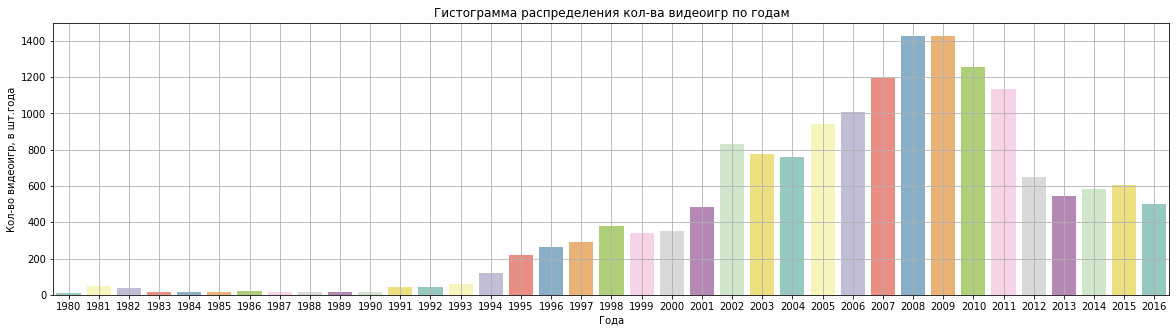

In [ ]:
# сделаем группировку в общей таблице и запишем данные в новый датасет
name_of_year = games.groupby(['year_of_release']).agg(
                                        game_count = ('name', 'count'),
                                        year = ('year_of_release', 'max'))
#проверим, получившуюся таблицу
display(name_of_year)

# построим гистограмму распределения кол-ва видеоигр по годам
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot (x = 'year', y = 'game_count', data = name_of_year, ax=ax, palette='Set3')
plt.title('Гистограмма распределения кол-ва видеоигр по годам')
plt.xlabel('Года')
plt.ylabel('Кол-во видеоигр, в шт.года')
plt.grid()
plt.show()
#name_of_year.hist()

В датасете представлены игры с датами выпуска с 1980 по 2016 гг.
График распределения выглядит нормально, пик числа игр приходится на 2007-2008г.
После 2012г. игр продается меньше, чем в пиковые периоды, но их кол-во с течением времени меняется не сильно.  
Данные до 1995 г. не так уже важны для дальнейшего исследования, т.к продавались менее 100 игр в год.и эти игры, скорее всего уже сильно устарели, появилось много новых игр.   

3.2. Посмотрим, как менялись продажи по платформам.

In [ ]:
#проверим, какие платформы популярны в 2014-2016 гг.
games_2014 = games.query("year_of_release > 2013")
display(games_2014['platform'].value_counts())


# сделаем группировку в общей таблице и запишем данные в новый датасет
games_2014 = games_2014.groupby(['platform']).agg(
                                        game_count = ('name', 'count'),
                                        sum_sale = ('total_sum', 'sum'),
                                        platform = ('platform', 'max'),)

#проверим, получившуюся таблицу
display(games_2014.sort_values('sum_sale', ascending=False))

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

,game_count,sum_sale,platform
platform,,,
PS4,376,288.15,PS4
XOne,228,140.36,XOne
3DS,212,86.68,3DS
PS3,219,68.18,PS3
X360,111,48.22,X360
WiiU,73,42.98,WiiU
PC,151,27.05,PC
PSV,295,22.40,PSV
Wii,11,5.07,Wii


Выберем платформы с наибольшими суммарными продажами и наиболее востребованными за последние 3 года.  
Построим распределение по годам.
Наиболее продаваемые платформы: PS4, XOne, 3DS, PS3, X360 и PC

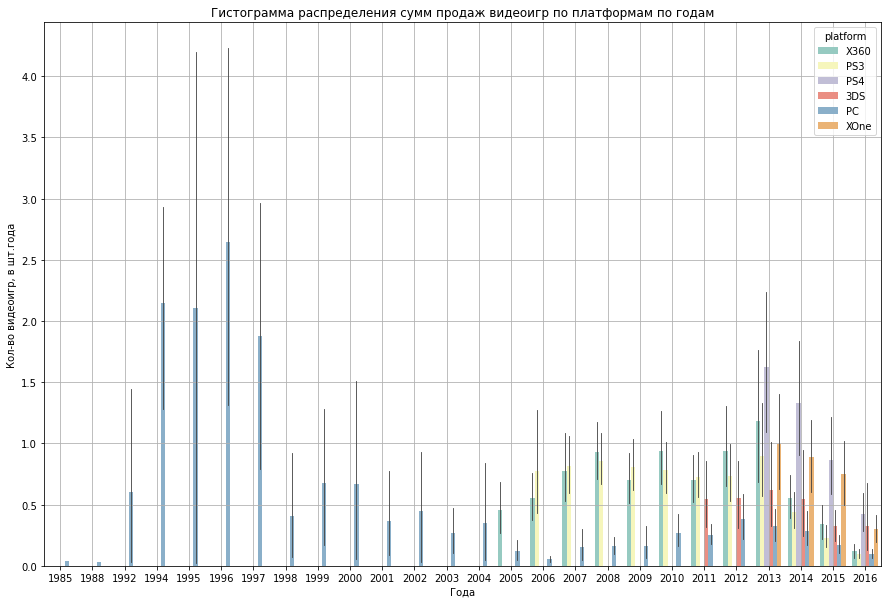

In [ ]:
#запишем в новый датасет данные по самым популярным платформам
popular_platform = games.query("platform == 'PS4' | platform == 'XOne' | platform == '3DS' | platform == 'PS3' | platform == 'X360' | platform == 'PC'")

# построим гистограмму распределения продаж по разным платформ видеоигр по годам
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot (x = 'year_of_release', y = 'total_sum', hue = 'platform', data = popular_platform,
             errwidth='0.85', ax=ax, palette='Set3')
plt.title('Гистограмма распределения сумм продаж видеоигр по платформам по годам')
plt.xlabel('Года')
plt.ylabel('Кол-во видеоигр, в шт.года')
plt.grid()
plt.show()

Из гистограммы распределения видно, что в среднем новые платформы появляются и исчезают в среднем за период 10 лет.
  Также можно заметить, что после 2013 года в данных остались только 5 платформы. Более популярны PS4, XOne, X360.  3DS - ныне мертвая платформа.    
  

3.3. Определим актуальный период, подходящий для оценки факторов, влияющих на рост продах игр.  
Возьмем данные за последние 5 лет, т.к по графику видно, что выручка имеет пиковые значения в среднем в этом периоде.   
Также оставим для исследования только 3 платформы, которые продаются в последние годы.

3.4. Удалим неактуальные данные. Подготовим очищенный датасет.

In [ ]:
#запишем в новый датасет данные по актуальным годам и всем популярным платформам
popular_platform_year = popular_platform.query("year_of_release == 2012 | year_of_release == 2013 | year_of_release == 2014 | year_of_release == 2015 | year_of_release == 2016 ")
#popular_platform_year = popular_platform_year.query("platform == 'PS4' |  platform == 'XOne' |  platform == 'X360'")
popular_platform_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 16 to 16710
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       2069 non-null   int64  
 1   name             2069 non-null   object 
 2   platform         2069 non-null   object 
 3   year_of_release  2069 non-null   int64  
 4   genre            2069 non-null   object 
 5   na_sales         2069 non-null   float64
 6   eu_sales         2069 non-null   float64
 7   jp_sales         2069 non-null   float64
 8   other_sales      2069 non-null   float64
 9   critic_score     2069 non-null   int64  
 10  user_score       2069 non-null   float64
 11  rating           2069 non-null   object 
 12  total_sum        2069 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 226.3+ KB


Получился датасет из 2069 объектов

3.5. Определим, какие платформы лидируют по продажам (посмотрим динамику).  
Выберем несколько потенциально прибыльных платформ.  

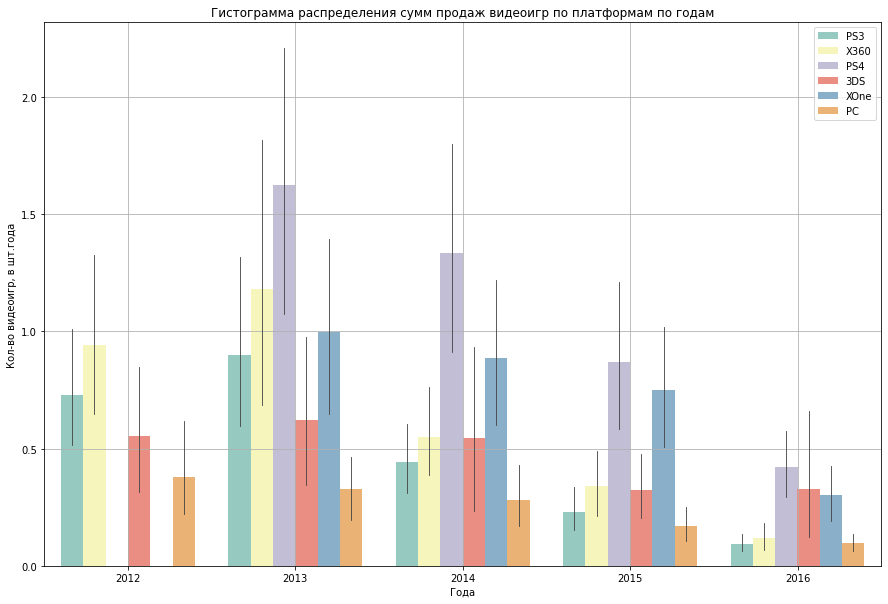

In [ ]:
# построим гистограмму распределения продаж по разным платформ видеоигр по годам
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot (x = 'year_of_release', y = 'total_sum', hue = 'platform', data = popular_platform_year, errwidth='0.85', ax=ax, palette='Set3')
plt.title('Гистограмма распределения сумм продаж видеоигр по платформам по годам')
plt.legend(loc='best')
plt.xlabel('Года')
plt.ylabel('Кол-во видеоигр, в шт.года')
plt.grid()
plt.show()

**Выводы**  
По графику заметен спад продаж игр на всех платформах. Потенциально прибыльные из имеющихся PS4 и XOne.

3.6. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.





In [ ]:
#построим график размаха с разбивкрй по платформам, чтобы выявить выбросы/аномалии
#popular_platform_XOne = popular_platform_year.query("platform == 'XOne'")
#plt.boxplot(popular_platform_XOne['total_sum'])
#plt.title('График размаха распределения сумм продаж видеоигр по платформе XOne')
#plt.grid()
#plt.ylim(0, 2)
#plt.show()

#popular_platform_XOne['total_sum'].describe()

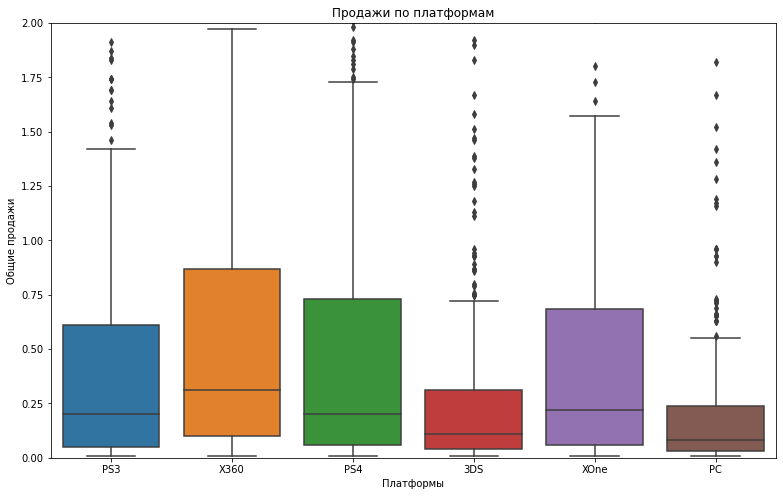

In [ ]:
#построим график размаха с разбивкрй по платформам, чтобы выявить выбросы/аномалии

plt.figure(figsize=(13, 8))
(sns.boxplot(data = popular_platform_year, y = 'total_sum', x='platform')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))
plt.ylim(0, 2)
plt.show()


#popular_platform_PS4 = popular_platform_year.query("platform == 'PS4'")
#plt.boxplot(popular_platform_PS4['total_sum'])
#popular_platform_PS4 = popular_platform_year.query("platform == 'PS4'")
#plt.boxplot(popular_platform_PS4['total_sum'])
# Создание boxplot для обоих наборов данных
#plt.boxplot([popular_platform_XOne, popular_platform_PS4], labels=['XOne', 'PS4'])
#plt.title('График размаха распределения сумм продаж видеоигр по платформам PS4')
#plt.ylim(0, 2)
#plt.grid()
#plt.show()
#popular_platform_XOne['total_sum'].describe()
#popular_platform_PS4['total_sum'].describe()

**Вывод**  
По графикам размаха видно, что присутствуют выбросы в данных по распределению продаж по платформам (для всех платформ).  
Лучшими по показателю продаж яв-ся - X360 и XOne, третья перспективная платформа PS4.   
Медианные значения по выручки у них выше и продаж больше, чем у остальных платформ.

<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b>
    
✍
Замечания:
    
    
* К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, например, задав параметр ylim.
    
    
* Прошу тебя построить одну диаграмму, на которой будут отображены все платформы из актуального периода (несколько ячщиков на одной оси)
    
    
* Прошу не забывать про оформление.
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий студента</b>
    
Ylim задала, но построить на одном графике 2 ящика не получилось.
</div>

<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.3</b>
    
✍
* Ты объединила несколько платформ в один ящик, но для корректного сравнения нужно, чтобы каждая платформа имела свой отдельный ящик на диаграмме. Это позволит увидеть различия между платформами, а не усреднённые данные. Ось X должна показывать названия платформ (например, PS4, XOne, 3DS и т.д.), а ось Y — их продажи. Тогда каждая платформа будет представлена своим ящиком, и их можно будет легко сравнить
    
    
* Не стоит ограничивать диаграмму размаха, нам нужно посмотреть все платформы из актуального периода.
    
    
Пример привел в анализе жанров.
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий студента</b>
    
Исправить получилось. Все стало более наглядно.
</div>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.4</b>
    
👍

</div>

3.7.Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

'Кореляция Пирсона для сумм продаж и оценок критиков: '

0.4104220356129637

'Кореляция Пирсона для сумм продаж и оценок пользователей: '

-0.09400318326920852

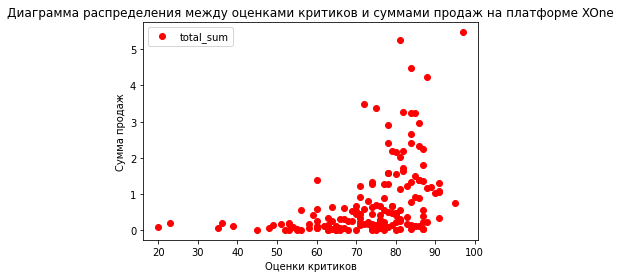

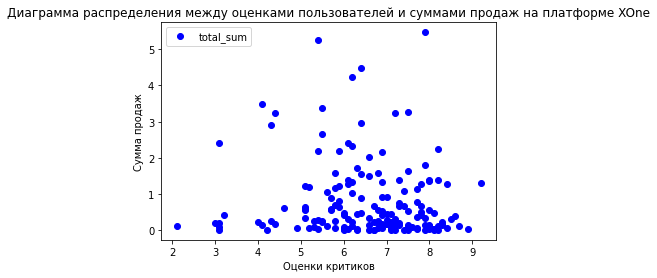

In [ ]:
#строим диаграмму рассеяния для визуализации взаимосвязи между двумя числовыми признаками с помощью точек,
#показывающих движение этих переменных вместе
popular_platform_XOne = popular_platform_year.query("platform == 'XOne'")
popular_platform_XOne = popular_platform_XOne .query("critic_score > 0")

popular_platform_XOne.plot(y = 'total_sum', x = 'critic_score', style = 'o', color = 'r')

plt.title(f'Диаграмма распределения между оценками критиков и суммами продаж на платформе XOne')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')

popular_platform_XOne = popular_platform_XOne.query("user_score > 0")
popular_platform_XOne.plot(y = 'total_sum', x = 'user_score', style = 'o', color = 'b')
plt.title(f'Диаграмма распределения между оценками пользователей и суммами продаж на платформе XOne')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')

#посчитаем корреляцию Пирсона для total_sum и (critic_score и user_score)
display ('Кореляция Пирсона для сумм продаж и оценок критиков: ',
         popular_platform_XOne['total_sum'].corr(popular_platform_XOne['critic_score']))
display ('Кореляция Пирсона для сумм продаж и оценок пользователей: ',
         popular_platform_XOne['total_sum'].corr(popular_platform_XOne['user_score']))

**Вывод:**  
По значениям корреляции можно сделать вывод, что связь между оценками критиков и пользователей игр на платформе XOne и продажами слабая. Т.е. оценки критиков и пользователей слабо влияют на продажи на данной платформе.

'Кореляция Пирсона для сумм продаж и оценок критиков: '

0.40589480145836687

'Кореляция Пирсона для сумм продаж и оценок пользователей: '

-0.03362497596528878

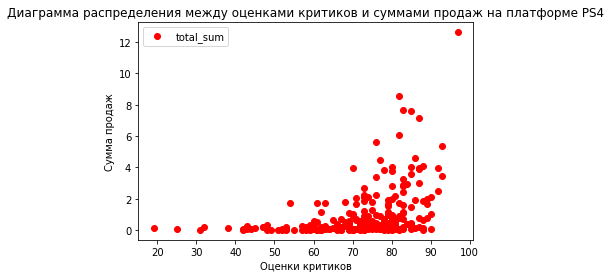

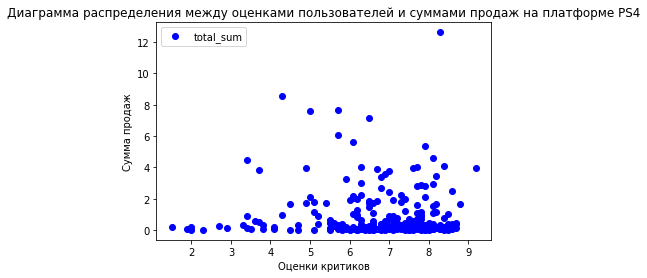

In [ ]:
#строим диаграмму рассеяния для визуализации взаимосвязи между двумя числовыми признаками с помощью точек,
#показывающих движение этих переменных вместе

popular_platform_PS4 = popular_platform_year.query("platform == 'PS4'")
popular_platform_PS4 = popular_platform_PS4 .query("critic_score > 0")

popular_platform_PS4.plot(y = 'total_sum', x = 'critic_score', style = 'o', color = 'r')
plt.title(f'Диаграмма распределения между оценками критиков и суммами продаж на платформе PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')

popular_platform_PS4 = popular_platform_PS4.query("user_score > 0")
popular_platform_PS4.plot(y = 'total_sum', x = 'user_score', style = 'o', color = 'b')
plt.title(f'Диаграмма распределения между оценками пользователей и суммами продаж на платформе PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')

#посчитаем корреляцию Пирсона для total_sum и (critic_score и user_score)
display ('Кореляция Пирсона для сумм продаж и оценок критиков: ',
         popular_platform_PS4['total_sum'].corr(popular_platform_PS4['critic_score']))
display ('Кореляция Пирсона для сумм продаж и оценок пользователей: ',
         popular_platform_PS4['total_sum'].corr(popular_platform_PS4['user_score']))

**Вывод:**  
По значениям корреляции можно сделать вывод, что для платформы PS4 влияние оценок критиков на продажи приближается к среднему, т.е. оценки критиков важны для продаж. Пользовательские оценки слабо влияют на продажи.

3.8. Соотнесите выводы с продажами игр на других платформах.  

'Кореляция Пирсона для сумм продаж и оценок критиков: '

0.36057348885073365

'Кореляция Пирсона для сумм продаж и оценок пользователей: '

-0.0020140394826897853

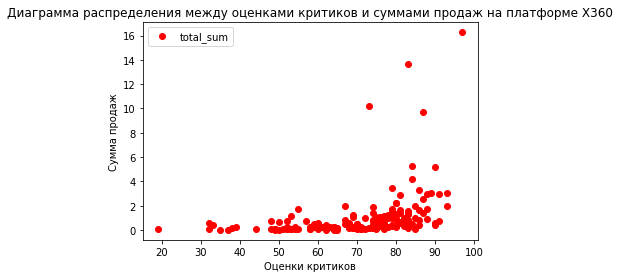

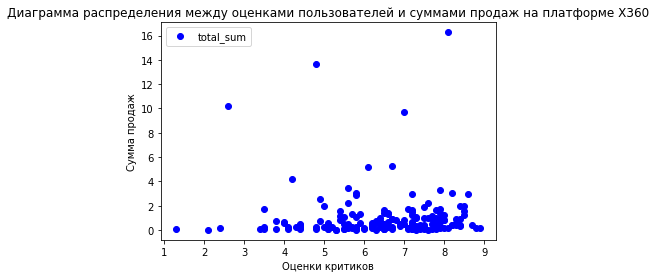

In [ ]:


popular_platform_Х360 = popular_platform_year.query("platform == 'X360'")
popular_platform_Х360 = popular_platform_Х360 .query("critic_score > 0")
#строим диаграмму рассеяния для визуализации взаимосвязи между двумя числовыми признаками с помощью точек,
#показывающих движение этих переменных вместе

popular_platform_Х360.plot(y = 'total_sum', x = 'critic_score', style = 'o', color = 'r')
plt.title(f'Диаграмма распределения между оценками критиков и суммами продаж на платформе Х360')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')

popular_platform_Х360 = popular_platform_Х360.query("user_score > 0")
popular_platform_Х360.plot(y = 'total_sum', x = 'user_score', style = 'o', color = 'b')
plt.title(f'Диаграмма распределения между оценками пользователей и суммами продаж на платформе Х360')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')

#посчитаем корреляцию Пирсона для total_sum и (critic_score и user_score)
display ('Кореляция Пирсона для сумм продаж и оценок критиков: ',
         popular_platform_Х360['total_sum'].corr(popular_platform_Х360['critic_score']))
display ('Кореляция Пирсона для сумм продаж и оценок пользователей: ',
         popular_platform_Х360['total_sum'].corr(popular_platform_Х360['user_score']))

**Вывод:**  
По значениям корреляции можно сделать вывод, что связь между оценками критиков и пользователей игр на платформе X360 и продажами очень слабая. Т.е. оценки критиков и пользователей слабо влияют на продажи на данной платформе.

'Кореляция Пирсона для сумм продаж и оценок критиков: '

0.11652676409395911

'Кореляция Пирсона для сумм продаж и оценок пользователей: '

0.0880609774881624

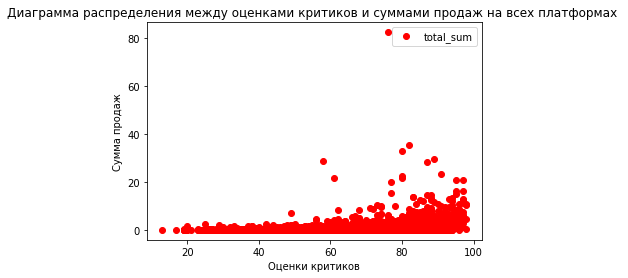

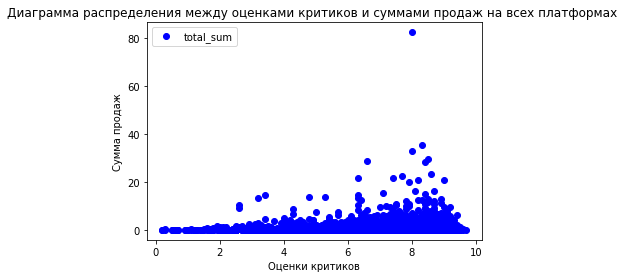

In [ ]:
#строим диаграмму рассеяния для визуализации взаимосвязи между двумя числовыми признаками с помощью точек,
#показывающих движение этих переменных вместе
games_al = games.query("critic_score > 0")

games_al.plot(y = 'total_sum', x = 'critic_score', style = 'o', color = 'r')
plt.title(f'Диаграмма распределения между оценками критиков и суммами продаж на всех платформах ')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')

games_al = games.query("user_score > 0")
games_al.plot(y = 'total_sum', x = 'user_score', style = 'o', color = 'b')
plt.title(f'Диаграмма распределения между оценками критиков и суммами продаж на всех платформах ')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж')

#посчитаем корреляцию Пирсона для total_sum и (critic_score и user_score)
display ('Кореляция Пирсона для сумм продаж и оценок критиков: ',
         games_al['total_sum'].corr(games_al['critic_score']))
display ('Кореляция Пирсона для сумм продаж и оценок пользователей: ',
         games_al['total_sum'].corr(games_al['user_score']))


**Вывод:**  
По значениям корреляции можно сделать вывод, что связь между оценками критиков и пользователей игр на всех платформах и продажами очень слабая. Т.е. оценки почти совсем не влияют на продажи на всех платформах.

На разных платформах оценки пользователей и критиков с разной степенью влияют на продажи.

3.9. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

,all_sum,genre_game,median_sum
genre,,,
Action,1716.52,Action,756.89
Sports,1309.66,Sports,756.89
Shooter,1041.36,Shooter,756.89
Role-Playing,931.08,Role-Playing,756.89
Platform,825.55,Platform,756.89
Misc,790.29,Misc,756.89
Racing,723.49,Racing,756.89
Fighting,442.66,Fighting,756.89
Simulation,387.96,Simulation,756.89


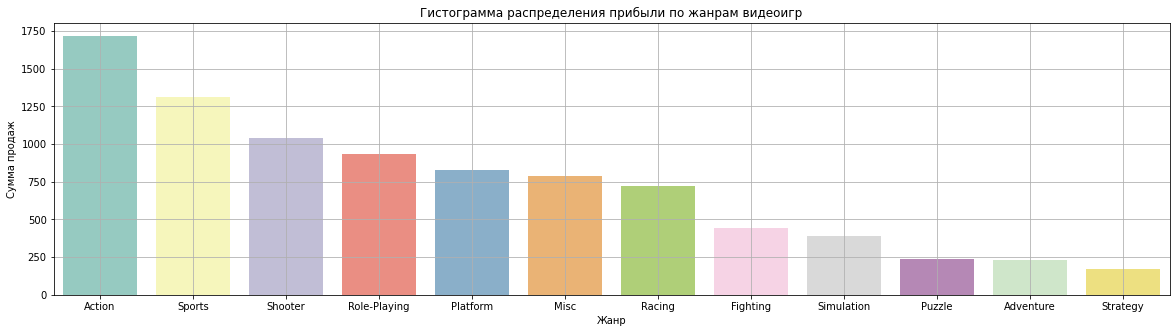

In [ ]:
# сделаем группировку в общей таблице и запишем данные в новый датасет

sum_of_genre = games.groupby(['genre']).agg(
                                        all_sum = ('total_sum', 'sum'),
                                        genre_game = ('genre', 'max'))
sum_of_genre['median_sum'] = sum_of_genre['all_sum'].median()

sum_of_genre = sum_of_genre.sort_values('all_sum', ascending=False)
#проверим, получившуюся таблицу
display(sum_of_genre)

# построим гистограмму распределения кол-ва видеоигр по жанрам
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot (x = 'genre_game', y = 'all_sum', data = sum_of_genre, ax=ax, palette='Set3')
plt.title('Гистограмма распределения прибыли по жанрам видеоигр')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.grid()
plt.show()

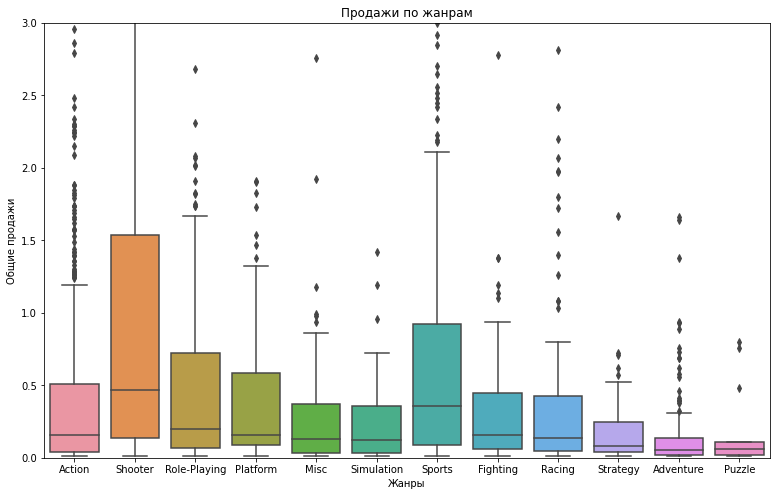

In [ ]:
#sum_of_genre['median_sum'] = sum_of_genre['all_sum'].median()
#sum_of_genre_d_action = sum_of_genre.query("genre == 'Action'")
#plt.boxplot(sum_of_genre['median_sum'])
#plt.title('График размаха распределения сумм продаж видеоигр по жанрам Action')
#plt.ylim(750, 760)
#plt.grid()
#plt.show()

#Диаграммы размаха для оценки выбросов и получения более объективной картины по продажам.
plt.figure(figsize=(13, 8))
(sns.boxplot(data = popular_platform_year, y = 'total_sum', x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()




По гистограмме размаха продаж по жанрам видно, что у жанра Shooter показатели по продажам лучше, чем у всех остальных жанров - размер ящика -больше, медиана также больше.
Второй по продажам выделяется жанр - Sports. Третий Rolle-Playing. Игры в указанных выше жанрах приносят больше прибыли и продаж.  
Самые низкопродаваемые - игр в жанрах Puzzle, Adventure и Strategy.

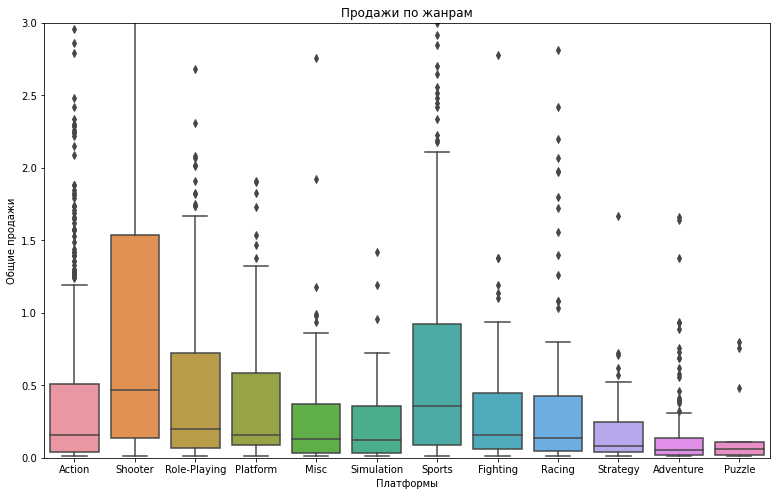

In [ ]:
# Код ревьюера

plt.figure(figsize=(13, 8))
(sns.boxplot(data = popular_platform_year, y = 'total_sum', x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

**Выводы по исследовательскому анализу данных:**
    
Для исследования выбран актуальный период - последние 5 лет.
В последние 3 года наблюдается спад продаж по всем платформам. Наиболее перспективные по росту продаж:  XOne и PS4.
В общем связь между оценками пользователей и критиками и продажами на всех платформах очень слабая.  
Среднее значение выручки по платформе XOne -0.8, медиана - 0.3.  
Среднее значение выручки по платформе PS4 -0.8, медиана - 0.2.
Но на разных платформах оценки пользователей и критиков с разной степенью влияют на продажи.  
У жанра Shooter показатели по продажам лучше, чем у всех остальных жанров - размер ящика -больше, медиана также больше.
Второй по продажам выделяется жанр - Sports. Третий Rolle-Playing. Игры в указанных выше жанрах приносят больше прибыли и продаж.  
Самые низкопродаваемые - игр в жанрах Puzzle, Adventure и Strategy.


## **Шаг №4. Портрет пользователя каждого региона**
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
#запишем в новый датасет данные по самым популярным платформам
popular_platform_new = popular_platform.query("year_of_release == 2012 | year_of_release == 2013 | year_of_release == 2014 | year_of_release == 2015 | year_of_release == 2016 ")
display (popular_platform_new)
popular_platform_new.info()

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sum
16,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-100,-100.0,unknown,14.63
33,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-100,-100.0,unknown,14.60
34,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,-100,-100.0,unknown,0.01
16678,16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,-100,-100.0,T,0.01
16691,16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,-100,-100.0,unknown,0.01
16692,16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 16 to 16710
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       2069 non-null   int64  
 1   name             2069 non-null   object 
 2   platform         2069 non-null   object 
 3   year_of_release  2069 non-null   int64  
 4   genre            2069 non-null   object 
 5   na_sales         2069 non-null   float64
 6   eu_sales         2069 non-null   float64
 7   jp_sales         2069 non-null   float64
 8   other_sales      2069 non-null   float64
 9   critic_score     2069 non-null   int64  
 10  user_score       2069 non-null   float64
 11  rating           2069 non-null   object 
 12  total_sum        2069 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 226.3+ KB


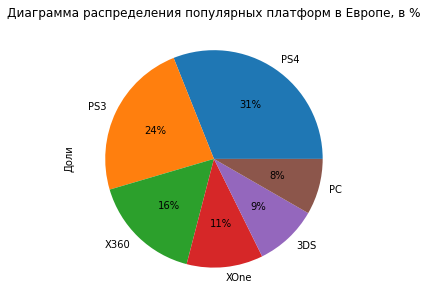

In [ ]:
#распределение копий игры в млн. на популярных платформах в разных регионах

region_of_platform = popular_platform_new.groupby(['platform']).agg(
                     eu_sales_sum = ('eu_sales', 'sum'),
                     na_sales_sum = ('na_sales', 'sum'),
                     jp_sales_sum = ('jp_sales', 'sum'),
                     platform = ('platform', 'max'))
region_of_platform ['total_sum_region'] = (region_of_platform['eu_sales_sum'] + region_of_platform['na_sales_sum'] +
                                          region_of_platform['jp_sales_sum'])
region_of_platform = region_of_platform.sort_values('eu_sales_sum', ascending=False)

#строим круговую диаграмму распределения продаж игр на популярных платформах в Европе
region_of_platform['eu_sales_sum'].plot(kind = 'pie', y = region_of_platform['platform'],
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения популярных платформ в Европе, в %');

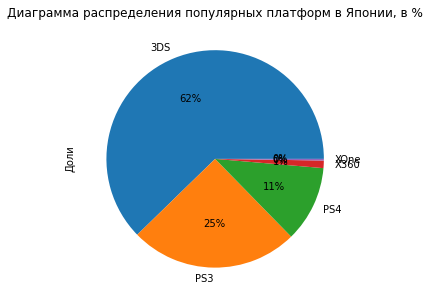

In [ ]:
region_of_platform = region_of_platform.sort_values('jp_sales_sum', ascending=False)
#строим круговую диаграмму распределения продаж игр на популярных платформах в Японии
region_of_platform['jp_sales_sum'].plot(kind = 'pie', y = region_of_platform['platform'],
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения популярных платформ в Японии, в %');

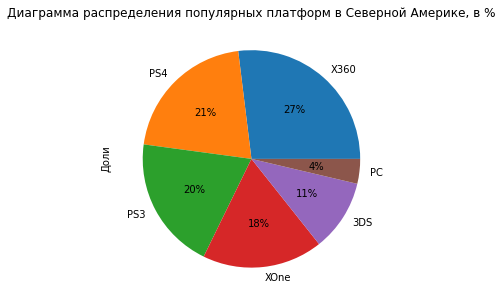

In [ ]:
region_of_platform = region_of_platform.sort_values('na_sales_sum', ascending=False)
#строим круговую диаграмму распределения продаж игр на популярных платформах в Северной Америке
region_of_platform['na_sales_sum'].plot(kind = 'pie', y = region_of_platform['platform'],
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения популярных платформ в Северной Америке, в %');

**Выводы:**   
В Европе самые самые популярные платформы: PS4 31%, PS3 24%, X360 16% , XOne 11%, 3DX 9%    
В Японии самые самые популярные платформы: 3DS 62%, PS3 25%, PS4 11%, X360 2%, XOne около 0%   
В Северной Америке самые популярные платформы: X360 27%, PS4 21%, PS3 20%, XOne 18%, 3DX 11%  

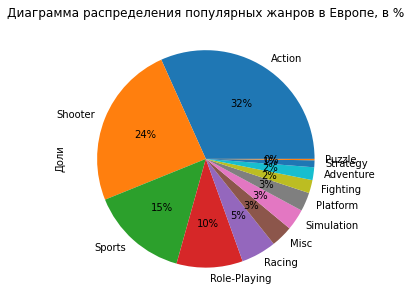

In [ ]:
#строим гистограмму распределения выручки от по жанрам
region_of_genre = popular_platform_new.groupby(['genre']).agg(
                     eu_sales_sum = ('eu_sales', 'sum'),
                     na_sales_sum = ('na_sales', 'sum'),
                     jp_sales_sum = ('jp_sales', 'sum'),
                     genre = ('genre', 'max') )
region_of_genre ['total_sum_region'] = (region_of_genre['eu_sales_sum'] + region_of_genre['na_sales_sum'] +
                                        region_of_genre['jp_sales_sum'] )

region_of_genre = region_of_genre.sort_values('eu_sales_sum', ascending=False)

#строим круговую диаграмму распределения продаж игр по жанрам в Европе
region_of_genre['eu_sales_sum'].plot(kind = 'pie', y = region_of_genre['genre'],
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения популярных жанров в Европе, в %');

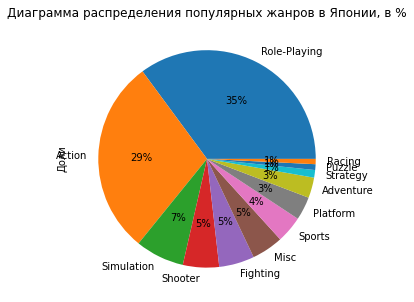

In [ ]:
region_of_genre = region_of_genre.sort_values('jp_sales_sum', ascending=False)

#строим круговую диаграмму распределения продаж игр по жанрам в Японии
region_of_genre['jp_sales_sum'].plot(kind = 'pie', y = region_of_genre['genre'],
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения популярных жанров в Японии, в %');

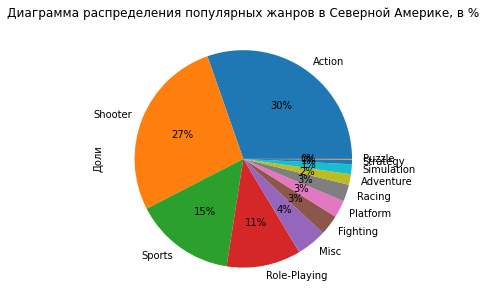

In [ ]:
region_of_genre = region_of_genre.sort_values('na_sales_sum', ascending=False)

#строим круговую диаграмму распределения продаж игр по жанрам в Северной Америке
region_of_genre['na_sales_sum'].plot(kind = 'pie', y = region_of_genre['genre'],
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения популярных жанров в Северной Америке, в %');

**Выводы:**   
В Европе самые самые популярные жанры: Action 32%, Shooter 24%,  Sport 15%, Role-Playeng 10%, Rasing 5%   
В Японии самые самые популярные жанры: Role-Playeng 35%, Action 29%, Simulation 7% и Shooter 5%, Fighting 5%    
В Северной Америке самые популярные жанры: Action 30%, Shooter 27%, Sport 15%, Role-Playeng 11%, Misc 4%      

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

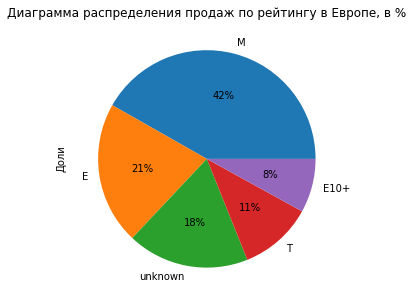

In [ ]:
#распределение копий игры в млн. в разных регионах в зависимости от рейтинга

region_of_rating = popular_platform_new.groupby(['rating']).agg(
                     eu_sales_sum = ('eu_sales', 'sum'),
                     na_sales_sum = ('na_sales', 'sum'),
                     jp_sales_sum = ('jp_sales', 'sum'),
                     rating = ('rating', 'max'))

region_of_rating = region_of_rating.sort_values('eu_sales_sum', ascending=False)

#строим круговую диаграмму распределения продаж игр в зависимости от рейтинга в Европе
region_of_rating['eu_sales_sum'].plot(kind = 'pie', y = region_of_rating['rating'],
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения продаж по рейтингу в Европе, в %');

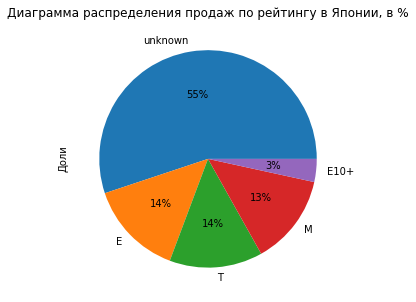

In [ ]:
region_of_rating = region_of_rating.sort_values('jp_sales_sum', ascending=False)

#строим круговую диаграмму распределения продаж игр в зависимости от рейтинга в Японии
region_of_rating['jp_sales_sum'].plot(kind = 'pie', y = region_of_rating['rating'],
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения продаж по рейтингу в Японии, в %');

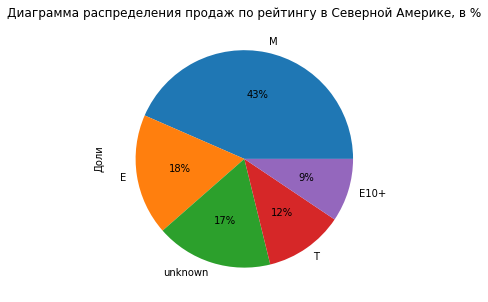

In [ ]:
region_of_rating = region_of_rating.sort_values('na_sales_sum', ascending=False)

#строим круговую диаграмму распределения продаж игр в зависимости от рейтинга в Северной Америке
region_of_rating['na_sales_sum'].plot(kind = 'pie', y = region_of_rating['rating'],
                                  autopct = '%1.0f%%', figsize=(5,5), ylabel = 'Доли',
                                  title = 'Диаграмма распределения продаж по рейтингу в Северной Америке, в %');

**Выводы:**   
В Европе бальше всего продаж игр с рейтингом: M 42%, E 21%, T 11%, E10+ 8%. У 18% рейтинг неизвестен.   
В Японии самые бальше всего продаж игр с рейтингом: E и T 14%, M 13%, E10+ 3%. У 55% рейтинг неизвестен.     
В Северной Америке бальше всего продаж игр с рейтингом: M 43%, E 18%,  и T 12%, E10+ 9%. У 17% рейтинг неизвестен  

**Выводы по анализу портрета пользователя по каждому региону:**
 Были подготовлены группировки по регионам с различным набором характеристик для проведения исследования.  
 Построены круговые диаграммы и посчитаны доли продаж по каждому из критерием.  
 Оценены полученные результаты:  

В Европе:  
- самые самые популярные платформы: PS4 31%, PS3 24%, X360 16% , XOne 11%, 3DX 9%  
- самые самые популярные жанры: Action 32%, Shooter 24%,  Sport 15%, Role-Playeng 10%, Rasing 5%    
- бальше всего продаж игр с рейтингом:  M 42%, E 21%, T 11%, E10+ 8%

В Японии:  
- самые самые популярные платформы: 3DS 62%, PS3 25%, PS4 11%, X360 2%, XOne около 0%   
- самые самые популярные жанры: Role-Playeng 35%, Action 29%, Simulation 7% и Shooter 5%, Fighting 5%    
- самые бальше всего продаж игр с рейтингом: E и T 14%, M 13%, E10+ 3%.

В Северной Америке:  
- самые популярные платформы:  X360 27%, PS4 21%, PS3 20%, XOne 18%, 3DX 11%
- самые популярные жанры:  Action 30%, Shooter 27%, Sport 15%, Role-Playeng 11%, Misc 4%    
- бальше всего продаж игр с рейтингом: M 43%, E 18%,  и T 12%, E10+ 9%.

Портреты пользователей в Европе и Северной Америке схожи.

## **Шаг 5. Проверка гипотез**  

5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
  
Нулевая гипотеза: Средние пользовательские рейтинги платформ XOne == PC  
Альтернативная: Средние пользовательские рейтинги платформ XOne != PC  
Уровень статистической значимости зададим = 5% (alpha = 0.05)  
Для проверки гипотизы найдем p-value и сравним его с уровнем статистической значимости

In [ ]:
#запишем в новый датасет данные по платформам XOne и PC
platform_XOne = games.query("year_of_release > 2013 & platform == 'XOne'")
platform_PC = games.query("year_of_release > 2013 & platform == 'PC'")


platform_XOne.info()
platform_PC.info()

alpha = 0.05

#проверим двустороннюю two-sided гипотезу о том, что истинное среднее в первом датасете== истиному среднего во втором.
#при разных дисперсий
results = st.ttest_ind(platform_XOne['user_score'], platform_PC['user_score'],
                       equal_var=False, alternative='two-sided')

display (results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 99 to 16672
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       228 non-null    int64  
 1   name             228 non-null    object 
 2   platform         228 non-null    object 
 3   year_of_release  228 non-null    int64  
 4   genre            228 non-null    object 
 5   na_sales         228 non-null    float64
 6   eu_sales         228 non-null    float64
 7   jp_sales         228 non-null    float64
 8   other_sales      228 non-null    float64
 9   critic_score     228 non-null    int64  
 10  user_score       228 non-null    float64
 11  rating           228 non-null    object 
 12  total_sum        228 non-null    float64
dtypes: float64(6), int64(3), object(4)
memory usage: 24.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 458 to 16692
Data columns (total 13 columns):
 #   Column           Non-Null

0.06149969471748772

'Нет оснований отвергнуть нулевую гипотезу'

Нет оснований отвергнуть нулевую гипотезу, т.е. есть основания утверждать, что рейтинги платформ XOne и PC равны, при заданном нами уровне значимости - 5 %.

5.2. Проверим вторую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action == Sports
Альтернативная: Средние пользовательские рейтинги платформ Action != Sports  
Уровень статистической значимости зададим = 5% (alpha = 0.05)  
Для проверки гипотизы найдем p-value и сравним его с уровнем статистической значимости

In [ ]:
#запишем в новый датасет данные по платформам XOne и PC

platform_Action = games.query("year_of_release > 2013 & genre == 'Action'")
platform_Sports = games.query("year_of_release > 2013 & genre == 'Sports'")

alpha = 0.05

#проверим двустороннюю two-sided гипотезу о том, что истинное среднее в первом датасете== истиному среднего во втором.
#при разных дисперсий (т.к. кол-во значений выборок в 4 раза отличается)
results = st.ttest_ind(platform_Action['user_score'], platform_Sports['user_score'],
                       equal_var=False, alternative='two-sided')

display (results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')

5.0214083316378155e-14

'Отвергаем нулевую гипотезу'

Есть основания отвергнуть нулевую гипотезу, т.е. есть основания утверждать, что редние пользовательские рейтинги жанров Action != Sports (разные), при заданном нами уровне значимости в 5 %

**Выводы по Проверке гипотез:**  
    1. Нет оснований отвергнуть нулевую гипотезу, т.е. есть основания утверждать, что рейтинги платформ XOne и PC равны, при заданном нами уровне значимости - 5 %.  
    2. Есть основания отвергнуть нулевую гипотезу, т.е. есть основания утверждать, что редние пользовательские рейтинги жанров Action != Sports не равны (разные), при заданном нами уровне значимости в 5 %

## **Шаг 6. Общие выводы**  

# Ключевые выводы исследования игрового рынка

## Анализ игровых платформ и трендов

### Динамика рынка:
- **Общий тренд**: Спад продаж за последние 3 года на всех платформах
- **Перспективные платформы**: XOne и PS4 демонстрируют наибольший потенциал роста
- **Актуальный период**: Данные за последние 5 лет наиболее релевантны для анализа

### Влияние оценок на продажи:
- **Общая корреляция**: Слабая связь между оценками пользователей/критиков и продажами
- **Платформенные различия**: Степень влияния оценок варьируется в зависимости от платформы

## 🎮 Анализ игровых жанров

### Лидеры по продажам:
1. **Shooters** - абсолютный лидер по прибыльности
2. **Sports** - стабильно высокие продажи
3. **Role-Playing** - сильные позиции на рынке

### Аутсайдеры рынка:
- **Puzzle** - наименьший коммерческий успех
- **Adventure** - низкие показатели продаж
- **Strategy** - ограниченная аудитория

## 🌍 Региональные особенности игрового рынка

### Европейский рынок:
- **Платформы**: PS4 (31%), PS3 (24%), X360 (16%)
- **Жанры**: Action (32%), Shooter (24%), Sports (15%)
- **Рейтинги**: M (42%), E (21%), T (11%)

### Японский рынок:
- **Платформы**: 3DS (62%), PS3 (25%), PS4 (11%)
- **Жанры**: Role-Playing (35%), Action (29%), Simulation (7%)
- **Рейтинги**: E/T (по 14%), M (13%)

### Северная Америка:
- **Платформы**: X360 (27%), PS4 (21%), PS3 (20%)
- **Жанры**: Action (30%), Shooter (27%), Sports (15%)
- **Рейтинги**: M (43%), E (18%), T (12%)

**Ключевое наблюдение**: Портреты пользователей Европы и Северной Америки схожи

## ✅ Статистически подтвержденные гипотезы

### Гипотеза 1: Сравнение рейтингов платформ
**"Рейтинги платформ XOne и PC равны"** ✅ ПОДТВЕРЖДЕНО
- Нет оснований отвергнуть нулевую гипотезу на уровне значимости 5%

### Гипотеза 2: Сравнение рейтингов жанров
**"Пользовательские рейтинги жанров Action и Sports различаются"** ✅ ПОДТВЕРЖДЕНО
- Есть основания утверждать о статистически значимом различии на уровне 5%

## Рекомендации для бизнеса

### Приоритетные направления:
- **Фокус на Shooters и Sports** - максимальная отдача от инвестиций
- **Развитие Role-Playing** - перспективный жанр с растущей аудиторией

### Региональные стратегии:
- **Европа и Северная Америка**: Единая маркетинговая стратегия (схожие предпочтения)
- **Япония**: Локализованный подход с акцентом на 3DS и Role-Playing игры

### Платформенная стратегия:
- **Инвестиции в PS4 и XOne** - наиболее перспективные платформы
- **Мониторинг новых трендов** - готовность к смене технологических циклов

### Продуктовая стратегия:
- **Баланс оценок** - не переоценивать влияние рейтингов на коммерческий успех
- **Региональная адаптация** - учет культурных особенностей при выборе контента

**Предложения для отдела маркетинга**

Для увеличения прибыльности онлайн-магазина "Стримчик" более эффективно планировать рекламную кампанию игр на наиболее популярных платформах, фанрах и рейтингу: XOne и PS4, жанры Shoters, Sports и Rolle-Playing и возрастным рейтингом "M" - для взрослых.